# Exploratory-Data-Analysis

A basic attempt to EDA with simple data cleaning and exploratory stuff. The dataset contains details of Zomato orders in the city of Bengaluru.




# Load data from Kaggle
*   Banglore Zomato Restaurants data

In [ ]:
!pip install kaggle --quiet

In [ ]:
!kaggle datasets download -d himanshupoddar/zomato-bangalore-restaurants

In [3]:
from zipfile import ZipFile
file_name = "zomato-bangalore-restaurants.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


# Basic analysis

*   Read csv file
*   Check no. of datapoints, attributes, missing values
*   unique values in each column







In [4]:
import pandas as pd
import numpy as np

In [53]:
df = pd.read_csv("zomato.csv")

In [54]:
df_copy = pd.read_csv("zomato.csv")

In [55]:
df.shape

(51717, 17)

In [56]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [57]:
#no. of columns
len(df.columns)

17

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

**Address is not that useful as listed_in(city) is already given**


In [59]:
df = df.drop('address',axis=1)

**URL doesnt give any useful info. So, dropping that as well**

In [60]:
df = df.drop('url',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   phone                        50509 non-null  object
 6   location                     51696 non-null  object
 7   rest_type                    51490 non-null  object
 8   dish_liked                   23639 non-null  object
 9   cuisines                     51672 non-null  object
 10  approx_cost(for two people)  51371 non-null  object
 11  reviews_list                 51717 non-null  object
 12  menu_item                    51717 non-null  object
 13  listed_in(type)              51

# Check the unique values in each column:

In [61]:
unique_values = df.nunique(axis=0)
print("The number of unique values in each column are: \n",unique_values)

The number of unique values in each column are: 
 name                            8792
online_order                       2
book_table                         2
rate                              64
votes                           2328
phone                          14926
location                          93
rest_type                         93
dish_liked                      5271
cuisines                        2723
approx_cost(for two people)       70
reviews_list                   22513
menu_item                       9098
listed_in(type)                    7
listed_in(city)                   30
dtype: int64


# Based on number 

Phone number is also not required,
But let's check if a restaurant which provides it's contact details 
has any advantage over the restaurants that doesn't.

In [62]:
len(df['phone'].unique())

14927

In [63]:
df['phone'].isna().sum()

1208

In [64]:
len(df_copy['address'].unique())

11495

Comparing the number of unique addresses, names, phone No. following assumptions can be drawn:

*   Many restaurants have more than 1 branch
*   Contact details are different for different branches under the same restaurant name



# Convert rating to floating point data

In [65]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [66]:
df['rate'] = df['rate'].str[0:3]
df['rate'] = df['rate'].replace('NEW','')
df['rate'] = df['rate'].replace('-','')

In [67]:
df['rate'] = df['rate'].replace(np.nan,'')

In [68]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', '', '2.9', '3.5', '2.6',
       '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3', '4.8',
       '4.9', '2.1', '2.0', '1.8'], dtype=object)

In [69]:
df['rate'] = pd.to_numeric(df['rate'])

In [70]:
df['rate'].dtype

dtype('float64')

In [71]:
df['phone'] = df['phone'].replace(np.nan,'-')

In [72]:
df['rate'].fillna(value=df['rate'].mean(),inplace=True)

In [73]:
df['rate'].isna().sum()

0

In [74]:
present = list()
attribute = 'phone'
for index in df.index:
  if(df[attribute][index]!='-'):
    present.append(df['rate'][index])


In [75]:
absent = list()
attribute = 'phone'
for index in df.index:
  if(df[attribute][index]=='-'):
    absent.append(df['rate'][index])

In [76]:
present = np.array(present)
#present contains an array of ratings of hotels which share phone numbers 

In [77]:
absent = np.array(absent)
#absent contains an array of ratings of hotels which do not share phone numbers 

In [78]:
from scipy.stats import ttest_ind

Checking for correlation between phone number and rating using t-test (independent t-test) with NULL hypothesis that phone number doesn't alter ratings

Check out more here: https://www.scribbr.com/statistics/t-test/#:~:text=A%20t%20test%20is%20a,are%20different%20from%20one%20another.

In [79]:
ttest, pval = ttest_ind(absent, present)
level_of_significance = 0.05
print("pval : ",pval)
if(pval<level_of_significance):
  print("Reject Null Hypothesis")
else:
  print("Do not reject Null Hypothesis")

pval :  0.0788707174371261
Do not reject Null Hypothesis


So, **Contact details does not affect the rating of a restaurant**


In [80]:
#dropping phone as it infers nothing
df = df.drop('phone',axis=1)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51717 non-null  object 
 1   online_order                 51717 non-null  object 
 2   book_table                   51717 non-null  object 
 3   rate                         51717 non-null  float64
 4   votes                        51717 non-null  int64  
 5   location                     51696 non-null  object 
 6   rest_type                    51490 non-null  object 
 7   dish_liked                   23639 non-null  object 
 8   cuisines                     51672 non-null  object 
 9   approx_cost(for two people)  51371 non-null  object 
 10  reviews_list                 51717 non-null  object 
 11  menu_item                    51717 non-null  object 
 12  listed_in(type)              51717 non-null  object 
 13  listed_in(city) 

# Filling empty columns


In [82]:
missing_data = df.isna().sum()/len(df)

<AxesSubplot:>

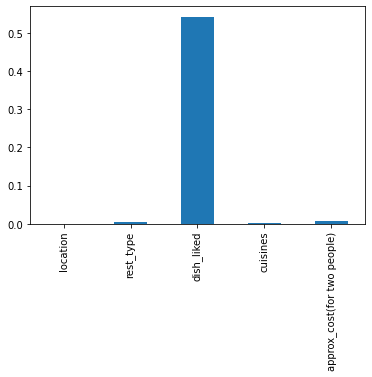

In [83]:
missing_data = missing_data[missing_data!=0]
missing_data.plot(kind='bar')


Half of the data in Dishes liked is missing

# Check for the most liked dishes and remove the column as well

In [84]:
popular_dishes = df['dish_liked'].values

In [85]:
popular_dishes

array(['Pasta, Lunch Buffet, Masala Papad, Paneer Lajawab, Tomato Shorba, Dum Biryani, Sweet Corn Soup',
       'Momos, Lunch Buffet, Chocolate Nirvana, Thai Green Curry, Paneer Tikka, Dum Biryani, Chicken Biryani',
       'Churros, Cannelloni, Minestrone Soup, Hot Chocolate, Pink Sauce Pasta, Salsa, Veg Supreme Pizza',
       ..., nan, 'Cocktails, Pizza, Buttermilk', nan], dtype=object)

In [ ]:
!pip install wordcloud

In [87]:
from wordcloud import WordCloud,STOPWORDS

In [88]:
import matplotlib.pyplot as plt

Leran more about stopwords here: https://kavita-ganesan.com/what-are-stop-words/

In [89]:
stopwords = set(STOPWORDS)
stopwords.update(['Lajawab', 'Lunch']) #adding Lajawab to the list of stopwords

Wordcloud of most favourite dishes

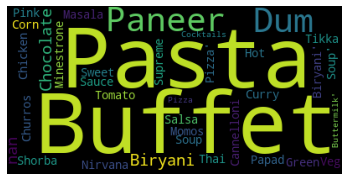

In [90]:
wordcloud = WordCloud(stopwords=stopwords).generate(str(popular_dishes))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Removing dish_liked since its of no further use

In [91]:
df = df.drop('dish_liked',axis=1)

# Filling empty entries
*   Convert approx_cost(for two people) to int64 and fillna with mean
*   Fillna rest_type with "Casual Dining"
*   Fillna location with most neighbourhood with large number of restaurants
*   Fillna Cuisine with most famous cuisine



In [92]:
#rename "approx_cost(for two people)" to "approx_cost"
df.rename(columns = {"approx_cost(for two people)":"approx_cost"}, inplace=True)

approx_cost contains elements like "1,200" (comma and other punctuations)

function to clean them up

In [147]:
df['approx_cost'] = df['approx_cost'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else x)

In [148]:
df["approx_cost"] = pd.to_numeric(df["approx_cost"])

Filling empty cells with mean value

In [96]:
mean = df['approx_cost'].mean()
df["approx_cost"].fillna(value=mean, inplace=True)

Restaurant type entries are default assumed to be Casual dining

In [97]:
df["rest_type"].fillna(value="Casual Dining", inplace=True)

Location 

In [98]:
famous_loc = df['location'].value_counts()

In [99]:
most_famous_loc = famous_loc[:10]

<AxesSubplot:xlabel='Area', ylabel='No. of restaurants'>

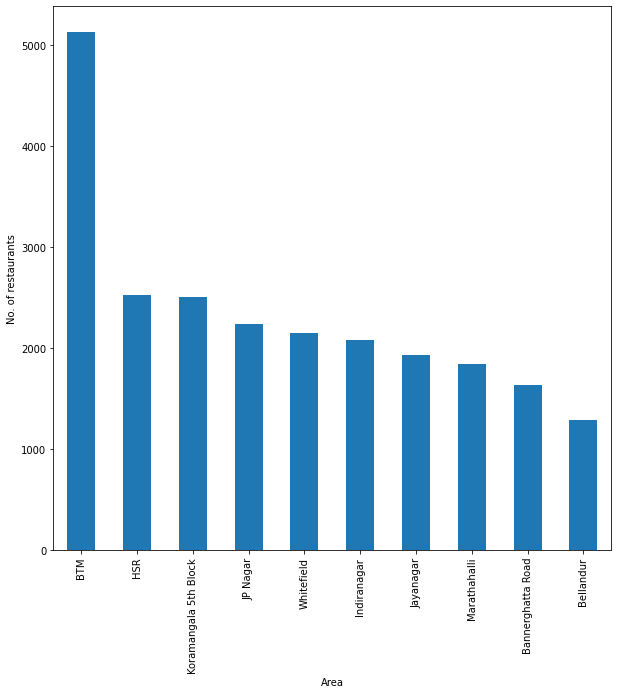

In [100]:
most_famous_loc.plot(kind = 'bar',
                     figsize=(10,10),
                     xlabel="Area",
                     ylabel="No. of restaurants")

Filling the empty cells with BTM as it has most number of restraunts

In [101]:
df["location"].fillna(value='BTM', inplace=True)

Cuisine

In [102]:
food = df['cuisines'].values

In [103]:
food

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ..., 'Finger Food', 'Finger Food',
       'Finger Food, North Indian, Continental'], dtype=object)

In [104]:
cuisines = []
for item in food:
  x = str(item).split(', ')
  for value in x:
    cuisines.append(value)

In [105]:
unique_elements, frequency = np.unique(cuisines, return_counts=True)
sorted_indexes = np.argsort(frequency)[::-1]
sorted_by_freq = unique_elements[sorted_indexes]

In [106]:
sorted_by_freq

array(['North Indian', 'Chinese', 'South Indian', 'Fast Food', 'Biryani',
       'Continental', 'Desserts', 'Cafe', 'Beverages', 'Italian',
       'Bakery', 'Street Food', 'Pizza', 'Burger', 'Seafood', 'Ice Cream',
       'Andhra', 'Mughlai', 'Rolls', 'American', 'Kerala', 'Asian',
       'Momos', 'Finger Food', 'Juices', 'Salad', 'Arabian', 'Kebab',
       'Mithai', 'Thai', 'Healthy Food', 'Sandwich', 'BBQ', 'European',
       'Mangalorean', 'Bengali', 'Steak', 'Mediterranean', 'Mexican',
       'Tea', 'Japanese', 'Tibetan', 'Hyderabadi', 'Chettinad',
       'Rajasthani', 'Lebanese', 'Vietnamese', 'Modern Indian', 'Korean',
       'Maharashtrian', 'Coffee', 'Oriya', 'Goan', 'Malaysian',
       'Middle Eastern', 'Gujarati', 'Indonesian', 'Bihari', 'Turkish',
       'Charcoal Chicken', 'French', 'Nepalese', 'Konkan', 'Afghan',
       'North Eastern', 'Wraps', 'Lucknowi', 'Burmese', 'Tex-Mex',
       'Singaporean', 'Spanish', 'Sushi', 'nan', 'Bar Food', 'Greek',
       'Kashmiri', 'Awadh

In [107]:
most_famous = sorted_by_freq[0]+sorted_by_freq[1]+sorted_by_freq[2]

In [108]:
df['cuisines'].fillna(value=most_famous, inplace=True)

In [109]:
df.isna().sum()

name               0
online_order       0
book_table         0
rate               0
votes              0
location           0
rest_type          0
cuisines           0
approx_cost        0
reviews_list       0
menu_item          0
listed_in(type)    0
listed_in(city)    0
dtype: int64

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             51717 non-null  object 
 1   online_order     51717 non-null  object 
 2   book_table       51717 non-null  object 
 3   rate             51717 non-null  float64
 4   votes            51717 non-null  int64  
 5   location         51717 non-null  object 
 6   rest_type        51717 non-null  object 
 7   cuisines         51717 non-null  object 
 8   approx_cost      51717 non-null  float64
 9   reviews_list     51717 non-null  object 
 10  menu_item        51717 non-null  object 
 11  listed_in(type)  51717 non-null  object 
 12  listed_in(city)  51717 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 5.1+ MB


# Covert online_order and book_table to bool

In [111]:
df["online_order"].value_counts()

Yes    30444
No     21273
Name: online_order, dtype: int64

In [112]:
df["online_order"] = df["online_order"].replace("Yes",True)
df["online_order"] = df["online_order"].replace("No",False)

In [113]:
df["book_table"].value_counts()

No     45268
Yes     6449
Name: book_table, dtype: int64

In [114]:
df["book_table"] = df["book_table"].replace("Yes",True)
df["book_table"] = df["book_table"].replace("No",False)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             51717 non-null  object 
 1   online_order     51717 non-null  bool   
 2   book_table       51717 non-null  bool   
 3   rate             51717 non-null  float64
 4   votes            51717 non-null  int64  
 5   location         51717 non-null  object 
 6   rest_type        51717 non-null  object 
 7   cuisines         51717 non-null  object 
 8   approx_cost      51717 non-null  float64
 9   reviews_list     51717 non-null  object 
 10  menu_item        51717 non-null  object 
 11  listed_in(type)  51717 non-null  object 
 12  listed_in(city)  51717 non-null  object 
dtypes: bool(2), float64(2), int64(1), object(8)
memory usage: 4.4+ MB


In [116]:
df['rest_type'].value_counts()

Quick Bites                   19132
Casual Dining                 10557
Cafe                           3732
Delivery                       2604
Dessert Parlor                 2263
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: rest_type, Length: 93, dtype: int64

# Checking avg.cost of Dining based on Area

*   Looking for areas with higher and lower dining costs
*   Identifying area with best value for money food



In [117]:
cost_df = df[['location','approx_cost']]

Calculating average cost by grouping into respective areas

In [118]:
cost_df = cost_df.groupby('location').mean()

<AxesSubplot:xlabel='location'>

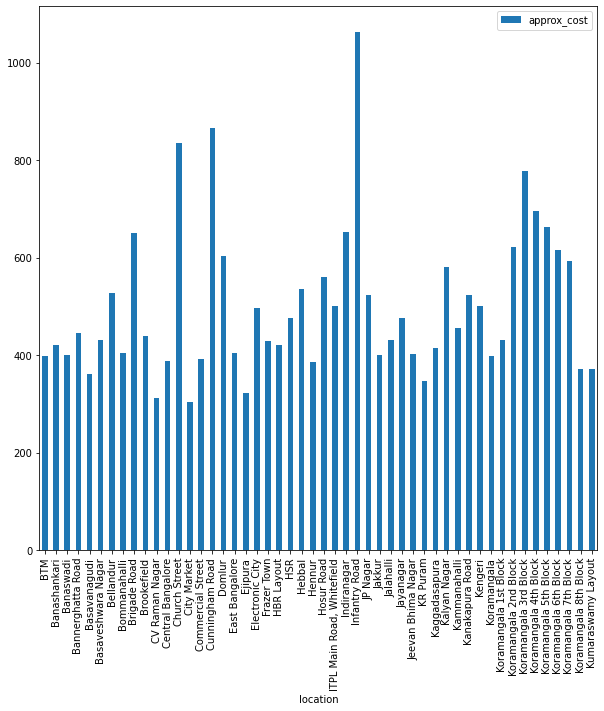

In [119]:
cost_df = cost_df.head(50)
cost_df.plot(kind='bar',
             figsize=(10,10))

In [120]:
cost_df = cost_df.sort_values("approx_cost",ascending=True)

# Lower costing areas

In [121]:
cost_df.head(5)

,approx_cost
location,
City Market,304.376441
CV Raman Nagar,311.111111
Ejipura,323.182592
KR Puram,347.222222
Basavanagudi,360.979532


# Higher costing areas

In [122]:
cost_df.tail(5)

,approx_cost
location,
Koramangala 4th Block,696.361849
Koramangala 3rd Block,778.472222
Church Street,834.885764
Cunningham Road,864.969450
Infantry Road,1062.251656


# Value for money
Rating/avg. cost

In [ ]:
value_for_money = df[['location','rate','approx_cost']]
value_for_money['rate_per_money'] = value_for_money['rate']/value_for_money['approx_cost']*100
value_for_money = value_for_money.groupby('location')['rate_per_money'].mean()

In [124]:
value_for_money

location
BTM                  1.148264
Banashankari         1.250318
Banaswadi            1.169924
Bannerghatta Road    1.046552
Basavanagudi         1.562460
                       ...   
West Bangalore       1.183433
Whitefield           0.897233
Wilson Garden        1.120855
Yelahanka            1.109037
Yeshwantpur          1.017306
Name: rate_per_money, Length: 93, dtype: float64

In [125]:
value_for_money = value_for_money.sort_values(ascending=False)

# Waste of money

In [126]:
value_for_money.tail(5)

location
Langford Town       0.488677
Infantry Road       0.486607
Lavelle Road        0.466284
Race Course Road    0.437861
Sankey Road         0.219534
Name: rate_per_money, dtype: float64

# Value for money

In [127]:
value_for_money.head(10)

location
Basavanagudi         1.562460
Shivajinagar         1.527648
City Market          1.511039
Ejipura              1.424264
CV Raman Nagar       1.382406
Vijay Nagar          1.348455
Commercial Street    1.337187
Majestic             1.333547
Thippasandra         1.272261
Hebbal               1.265919
Name: rate_per_money, dtype: float64

<AxesSubplot:xlabel='location'>

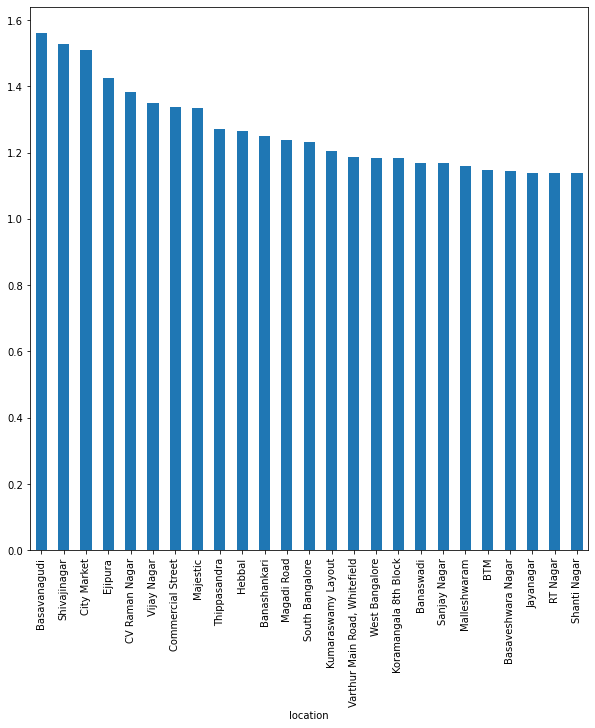

In [128]:
value_for_money = value_for_money.head(25)
value_for_money.plot(kind='bar',
                     y = 'rate_per_money',
                     figsize=(10,10))

# Does higher approx_cost mean better food??


In [129]:
cost_vs_food = df[['approx_cost','rate']]

In [130]:
cost_vs_food = np.array(cost_vs_food)

In [131]:
from scipy.stats import pearsonr

In [132]:
corr, _ = pearsonr(cost_vs_food[:,1], cost_vs_food[:,0])

In [133]:
corr

0.3649343037720216

In [134]:
from scipy.stats import spearmanr

In [135]:
corr, _ = spearmanr(cost_vs_food[:,1], cost_vs_food[:,0])

In [136]:
corr

0.3373743766564666

Correlation of 0.34 and 0.36 imply medium level of correlation but not significant as well.

 So, you can bet that you can find above average food at expensive restraunts

# Handling Multi Category variables
*   Creating a One Hot encoding for categorical features
*   Considering only 'n' most frequently seen variable

Label Encoding : 

apple = 1

orange = 2

mango = 0

One-Hot Encoding:

apple = [0,1,0]

orange = [0,0,2]

mango = [1,0,0]

In [137]:
def one_hot_encoding(df,column):
  most_freq = df[column].value_counts().sort_values(ascending=False).head(10).index
  for label in most_freq:
    df[label+'_loc'] = np.where(df[column]==label,1,0)

In [138]:
one_hot_encoding(df,'location')

In [139]:
df

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,reviews_list,...,BTM_loc,HSR_loc,Koramangala 5th Block_loc,JP Nagar_loc,Whitefield_loc,Indiranagar_loc,Jayanagar_loc,Marathahalli_loc,Bannerghatta Road_loc,Bellandur_loc
0,Jalsa,True,True,4.100000,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",...,0,0,0,0,0,0,0,0,0,0
1,Spice Elephant,True,False,4.100000,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",...,0,0,0,0,0,0,0,0,0,0
2,San Churro Cafe,True,False,3.800000,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",...,0,0,0,0,0,0,0,0,0,0
3,Addhuri Udupi Bhojana,False,False,3.700000,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",...,0,0,0,0,0,0,0,0,0,0
4,Grand Village,False,False,3.800000,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,False,False,3.600000,27,Whitefield,Bar,Continental,1500.0,"[('Rated 5.0', ""RATED\n Food and service are ...",...,0,0,0,0,1,0,0,0,0,0
51713,Vinod Bar And Restaurant,False,False,3.700449,0,Whitefield,Bar,Finger Food,600.0,[],...,0,0,0,0,1,0,0,0,0,0
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,False,False,3.700449,0,Whitefield,Bar,Finger Food,2000.0,[],...,0,0,0,0,1,0,0,0,0,0
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,False,True,4.300000,236,"ITPL Main Road, Whitefield",Bar,Finger Food,2500.0,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",...,0,0,0,0,0,0,0,0,0,0
